# IG² Attribution Rankings

This notebook visualizes the top features identified by IG² (Integrated Gradients squared) attribution.

**Purpose:**
- Identify the most important features for bias prediction per demographic
- Compare feature importance across demographics
- Understand which features have the highest attribution scores

**Input Data:**
- IG² attribution scores: [100,000] per demographic

**Output:**
- 3×3 grid of ranked bar charts (top-20 per demographic)
- Score distribution histograms

In [1]:
import os
import sys
from pathlib import Path

import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PROJECT_ROOT = Path(os.getcwd()).parent.parent
sys.path.append(str(PROJECT_ROOT))

from src.visualization import (
    setup_korean_font,
    load_demographics,
    load_ig2_results,
    plot_ig2_rankings,
    get_demographic_labels
)

print(f"Project root: {PROJECT_ROOT}")

/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Project root: /home/youngjins/project/global_ai_frontier


In [2]:
# Setup
setup_korean_font()
sns.set_style('whitegrid')
sns.set_context('paper')

Font configured: ['Noto Sans CJK KR']


In [3]:
# Configuration
DATA_DIR = PROJECT_ROOT / "data"
RESULTS_DIR = PROJECT_ROOT / "results"
ASSETS_DIR = PROJECT_ROOT / "notebooks" / "visualizations" / "assets"
ASSETS_DIR.mkdir(exist_ok=True, parents=True)

# Stage: 'pilot', 'medium', or 'full'
STAGE = "pilot"

# SAE configuration (for reference)
SAE_TYPE = "gated"  # 'standard' or 'gated'
LAYER_QUANTILE = "q2"  # 'q1', 'q2', or 'q3'

# Visualization parameters
TOP_K = 20

print(f"Stage: {STAGE}")
print(f"SAE type: {SAE_TYPE}")
print(f"Layer quantile: {LAYER_QUANTILE}")
print(f"Top-K: {TOP_K}")

Stage: pilot
SAE type: gated
Layer quantile: q2
Top-K: 20


## Load Data

In [4]:
# Load demographics
demographics_dict = load_demographics(DATA_DIR)
demographic_labels_ko, demographic_labels_en = get_demographic_labels(demographics_dict)

# Load IG² results (loads from all per-demographic directories)
ig2_results = load_ig2_results(RESULTS_DIR, stage=STAGE)

print(f"Loaded IG² results for {len(ig2_results)} demographics")
for demo, data in ig2_results.items():
    print(f"  - {demo}")

Loaded IG² results for 9 demographics
  - 외모
  - 성적지향
  - 정치성향
  - 직업
  - 종교
  - 경제수준
  - 성별
  - 인종
  - 나이


## Plot Top-K Rankings

/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:175: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:175: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:175: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:175: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src/visualization/plotting_utils.py:175: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/youngjins/project/global_ai_frontier/src

Saved to /home/youngjins/project/global_ai_frontier/notebooks/visualizations/assets/ig2_rankings_pilot_top20.png


/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/youngjins/miniconda3/envs/belief_llm/lib/python3.11/site-packages/

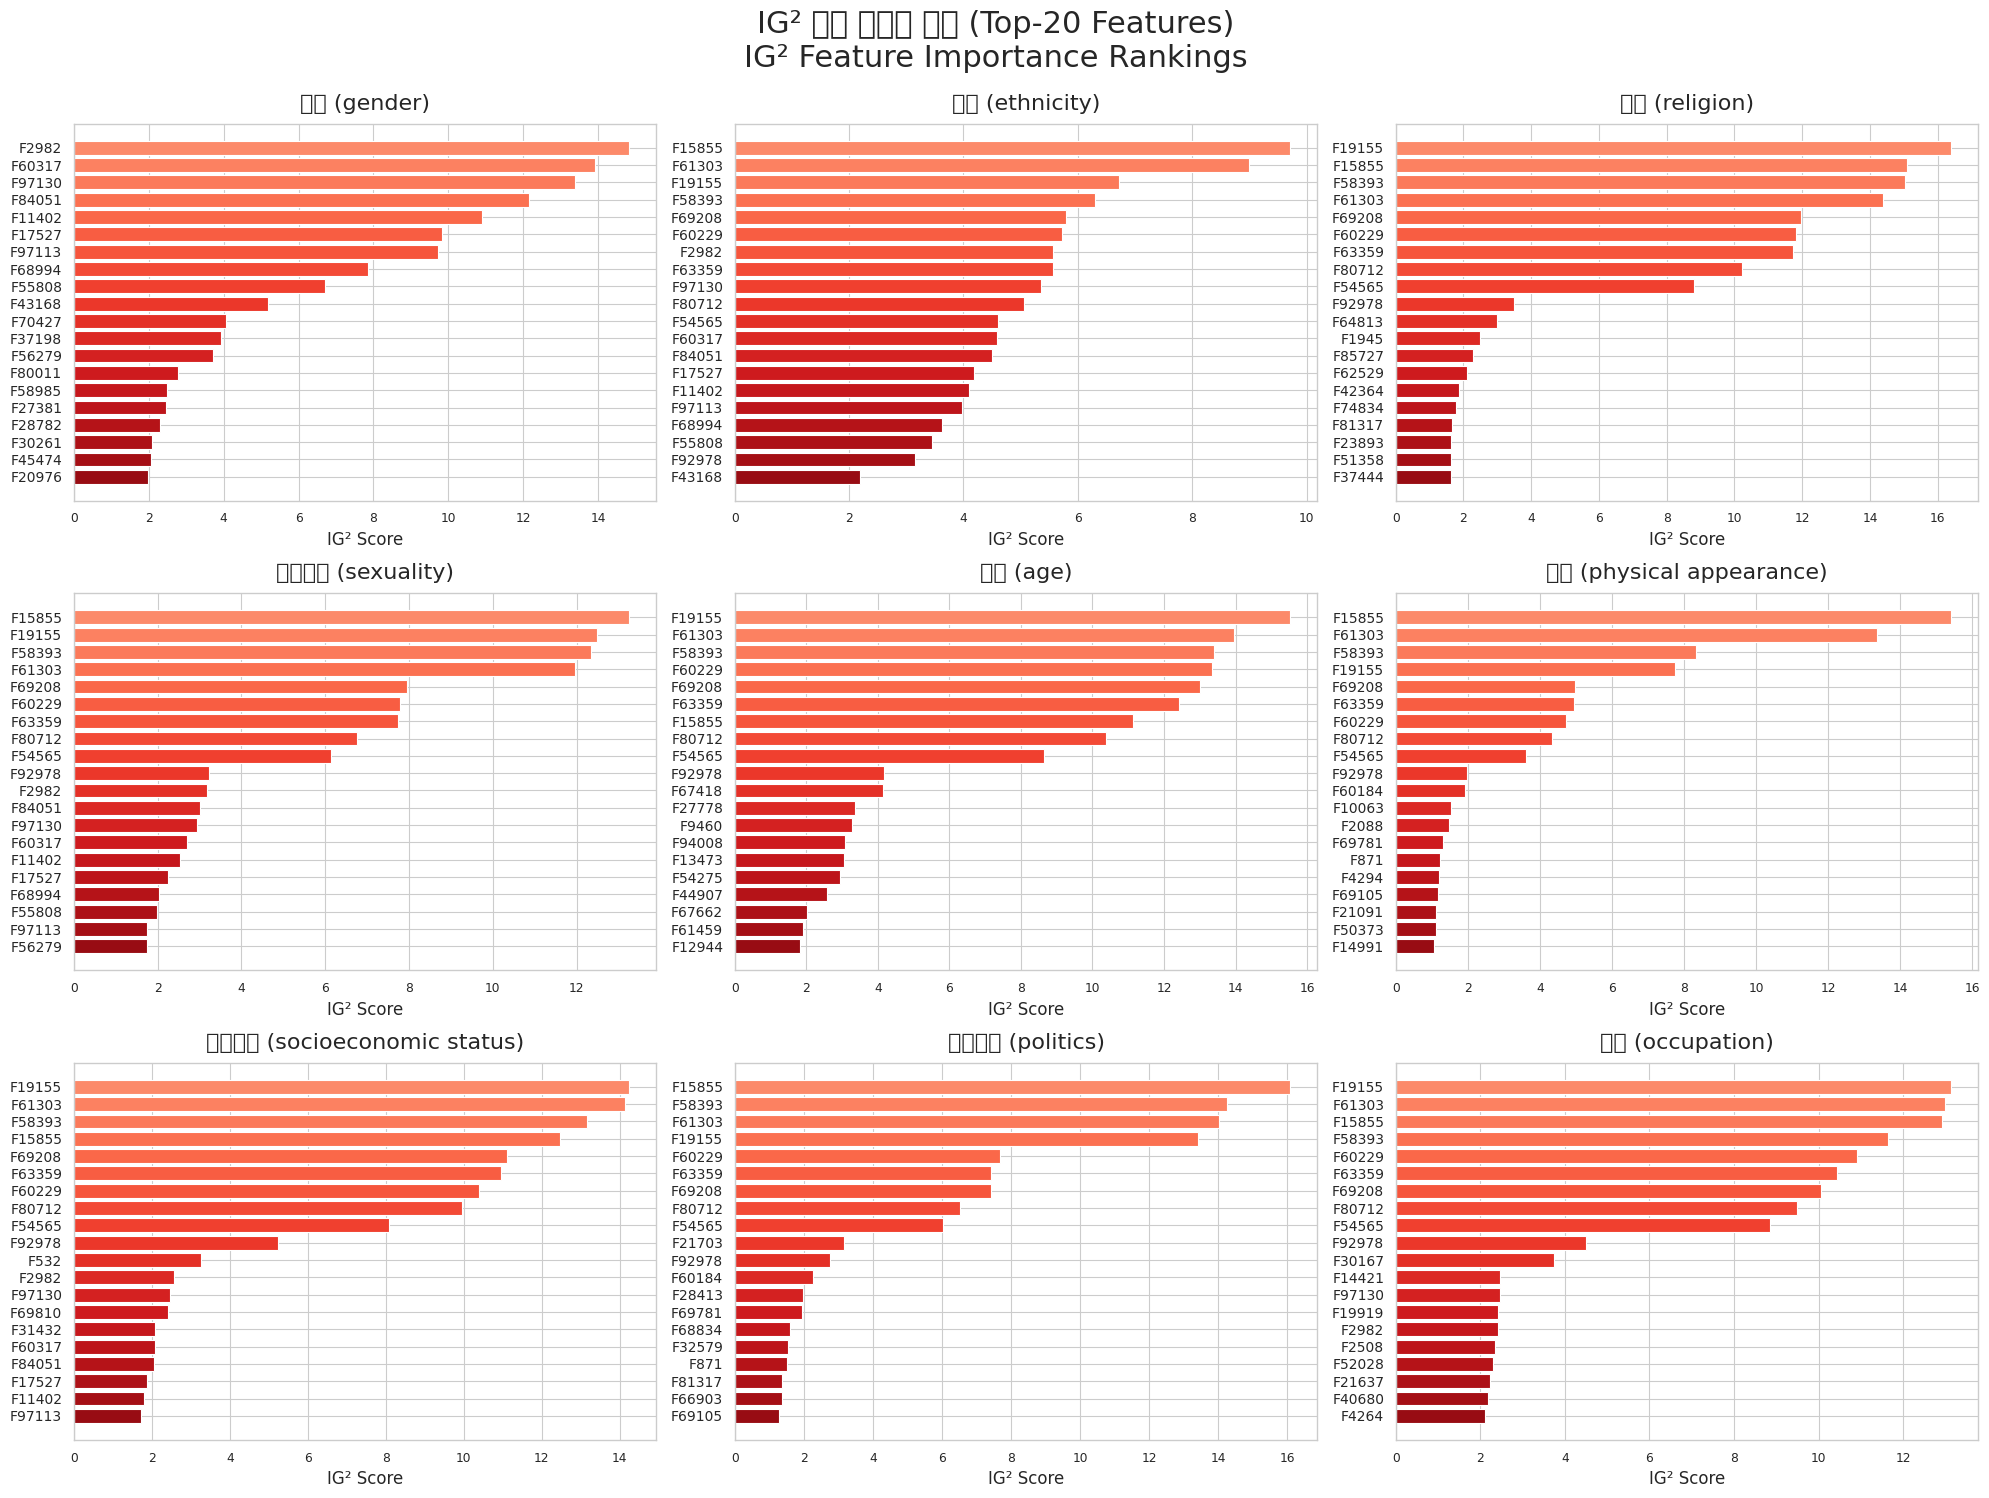

In [5]:
fig = plot_ig2_rankings(
    ig2_results=ig2_results,
    demographic_labels_ko=demographic_labels_ko,
    demographic_labels_en=demographic_labels_en,
    save_path=ASSETS_DIR / f"ig2_rankings_{STAGE}_top{TOP_K}.png",
    top_k=TOP_K,
    figsize=(20, 15)
)

plt.show()

## Score Distribution Analysis

/tmp/ipykernel_16664/2376865803.py:22: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2376865803.py:22: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2376865803.py:22: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2376865803.py:22: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2376865803.py:22: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2376865803.py:22: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2376865803.py:22: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  

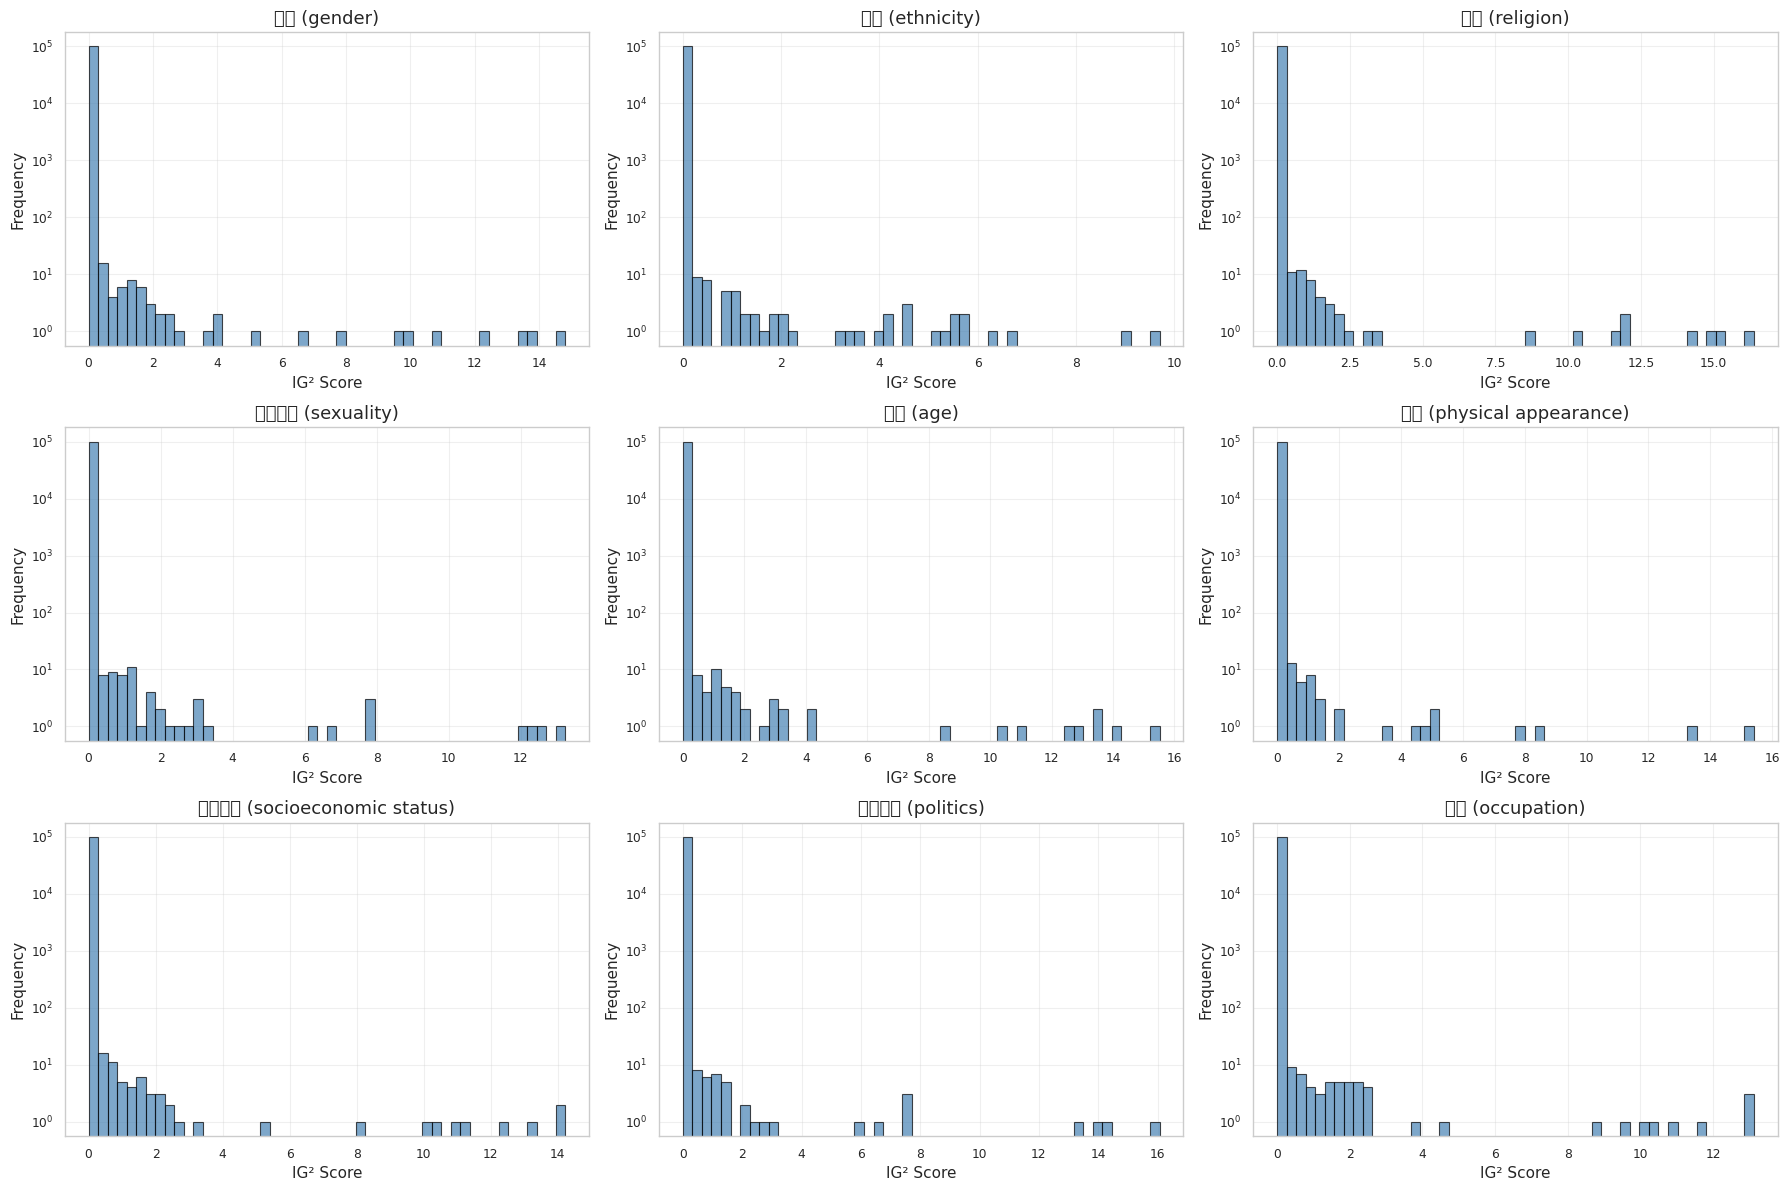

In [6]:
# Plot score distributions
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (demo_ko, demo_en) in enumerate(zip(demographic_labels_ko, demographic_labels_en)):
    ax = axes[i]
    
    scores = ig2_results[demo_ko]
    if isinstance(scores, dict):
        scores = scores['feature_scores']
    
    scores = scores.cpu().numpy()
    
    # Histogram
    ax.hist(scores, bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    ax.set_xlabel('IG² Score', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f"{demo_ko} ({demo_en})", fontsize=13)
    ax.set_yscale('log')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.savefig(ASSETS_DIR / f"ig2_score_distributions_{STAGE}.png", dpi=300, bbox_inches='tight')
plt.show()

## Comparative Statistics

In [7]:
import pandas as pd

# Compute statistics per demographic
stats = []

for demo_ko in demographic_labels_ko:
    scores = ig2_results[demo_ko]
    if isinstance(scores, dict):
        scores = scores['feature_scores']
    
    scores = scores.cpu().numpy()
    
    stats.append({
        'Demographic': demo_ko,
        'Max Score': scores.max(),
        'Mean Score': scores.mean(),
        'Median Score': np.median(scores),
        'Std Dev': scores.std(),
        'Top-10 Mean': np.sort(scores)[-10:].mean(),
        'Non-zero %': (scores > 0).mean() * 100
    })

df_stats = pd.DataFrame(stats)
print("\nIG² Score Statistics by Demographic:")
print("=" * 80)
print(df_stats.to_string(index=False))

# Save to CSV
df_stats.to_csv(ASSETS_DIR / f"ig2_statistics_{STAGE}.csv", index=False)
print(f"\nSaved to {ASSETS_DIR / f'ig2_statistics_{STAGE}.csv'}")


IG² Score Statistics by Demographic:
Demographic  Max Score  Mean Score  Median Score  Std Dev  Top-10 Mean  Non-zero %
         성별  14.814608    0.001733           0.0 0.114512    10.443352       0.079
         인종   9.704399    0.001375           0.0 0.079513     6.478355       0.111
         종교  16.378773    0.001701           0.0 0.126906    11.890554       0.084
       성적지향  13.239117    0.001498           0.0 0.099947     8.960190       0.079
         나이  15.513445    0.001787           0.0 0.124894    11.600365       0.101
         외모  15.403328    0.001003           0.0 0.082419     6.943799       0.085
       경제수준  14.226210    0.001671           0.0 0.116617    10.971148       0.076
       정치성향  16.065922    0.001319           0.0 0.106957     9.600940       0.056
         직업  13.121732    0.001747           0.0 0.113112    10.492847       0.125

Saved to /home/youngjins/project/global_ai_frontier/notebooks/visualizations/assets/ig2_statistics_pilot.csv


## Cross-Demographic Comparison

/tmp/ipykernel_16664/2031090879.py:15: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2031090879.py:15: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2031090879.py:15: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2031090879.py:15: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2031090879.py:15: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2031090879.py:15: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_16664/2031090879.py:15: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  

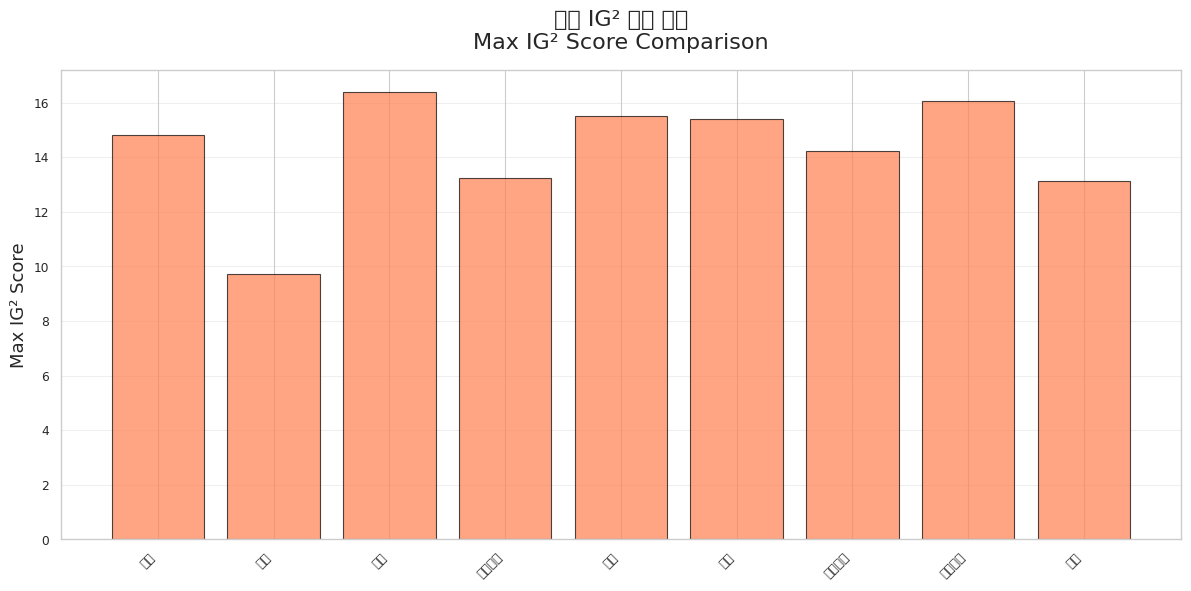

In [8]:
# Compare top scores across demographics
fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(demographic_labels_ko))
max_scores = [ig2_results[d]['feature_scores'].max().item() if isinstance(ig2_results[d], dict) 
              else ig2_results[d].max().item() for d in demographic_labels_ko]

ax.bar(x, max_scores, color='coral', alpha=0.7, edgecolor='black')
ax.set_xticks(x)
ax.set_xticklabels(demographic_labels_ko, rotation=45, ha='right')
ax.set_ylabel('Max IG² Score', fontsize=13)
ax.set_title('최대 IG² 점수 비교\nMax IG² Score Comparison', fontsize=16, pad=15)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(ASSETS_DIR / f"ig2_max_scores_comparison_{STAGE}.png", dpi=300, bbox_inches='tight')
plt.show()

## Interpretation

### What to Look For:

1. **Score Magnitude:**
   - Which demographics have the highest attribution scores?
   - Are scores concentrated in a few features or distributed?

2. **Top Features:**
   - Which features consistently appear at the top?
   - Are there demographic-specific vs. shared top features?

3. **Score Distribution:**
   - Is the distribution power-law (few high, many low)?
   - What percentage of features have non-zero scores?

### Next Steps:

1. Examine activation patterns for top features
2. Test suppression effects on highest-scoring features
3. Investigate feature overlap with UMAP clustering